In [34]:
"""
TIME SERIES FORECASTING

How to remove stationarity?
If a series has : 1. Constant mean  2. Constant Variance  3. Autovariance that does not depend on time, it is called 
stationary series.

How to test stationarity?
Rolling Statistics: Plot the moving average or moving variance and see if it varies with time. More of a visual technique.
ADCF test: Null hypothesis is that the TS is non stationary. The test result comprise of a Test Statistic and some Critical 
values.

ARIMA Model:
AR - Auto Regressive
MA - Moving Average
I - Integration
Three main component of ARIMA Model: P = autoregressive lags, Q = moving average, d = order of differentiation
"""

'\nTIME SERIES FORECASTING\n\nHow to remove stationarity?\nIf a series has : 1. Constant mean  2. Constant Variance  3. Autovariance that does not depend on time, it is called \nstationary series.\n\nHow to test stationarity?\nRolling Statistics: Plot the moving average or moving variance and see if it varies with time. More of a visual technique.\nADCF test: Null hypothesis is that the TS is non stationary. The test result comprise of a Test Statistic and some Critical \nvalues.\n\nARIMA Model:\nAR - Auto Regressive\nMA - Moving Average\nI - Integration\nThree main component of ARIMA Model: P = autoregressive lags, Q = moving average, d = order of differentiation\n'

In [12]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools as itr
%matplotlib inline
from matplotlib.pyplot import rcParams
from datetime import datetime
rcParams['figure.figsize'] = 10,6


In [13]:
# reading dataset and setting index
df = pd.read_csv("C://Users/yare01/Documents/SMS/KAPH/AirPassengers.csv")
df.head(5)

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [14]:
#df['value']=df['value'].str.replace(',','').astype(float)

In [15]:
df['Month'] = pd.to_datetime(df['date'], infer_datetime_format=True)
indexedDataFrame = df.set_index(['Month'])
indexedDataFrame.head(5)

,date,value
Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121


'\nWe observe that there is upward trend and the mean is not constant. This means that data is not stationary.\n'

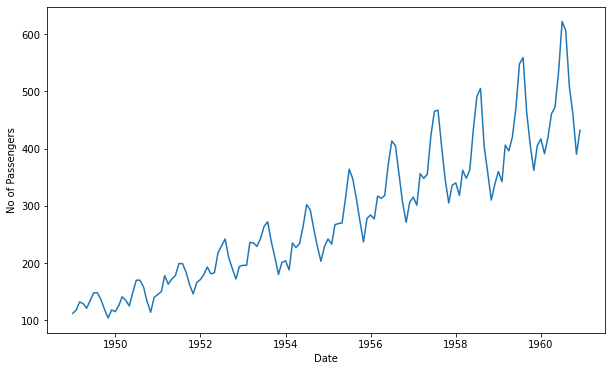

In [16]:
# indexedDataFrame.drop('date', inplace=True, axis=1)
# Plotting
plt.xlabel('Date')
plt.ylabel('No of Passengers')
plt.plot(indexedDataFrame['value'])
"""
We observe that there is upward trend and the mean is not constant. This means that data is not stationary.
"""

In [17]:
# Checking the stationarity by Rolling Statistics
rollingmean = indexedDataFrame.rolling(window=12).mean()
rollingstd = indexedDataFrame.rolling(window=12).std()
print(rollingmean,rollingstd)


                 value
Month                 
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
...                ...
1960-08-01  463.333333
1960-09-01  467.083333
1960-10-01  471.583333
1960-11-01  473.916667
1960-12-01  476.166667

[144 rows x 1 columns]                 value
Month                
1949-01-01        NaN
1949-02-01        NaN
1949-03-01        NaN
1949-04-01        NaN
1949-05-01        NaN
...               ...
1960-08-01  83.630500
1960-09-01  84.617276
1960-10-01  82.541954
1960-11-01  79.502382
1960-12-01  77.737125

[144 rows x 1 columns]


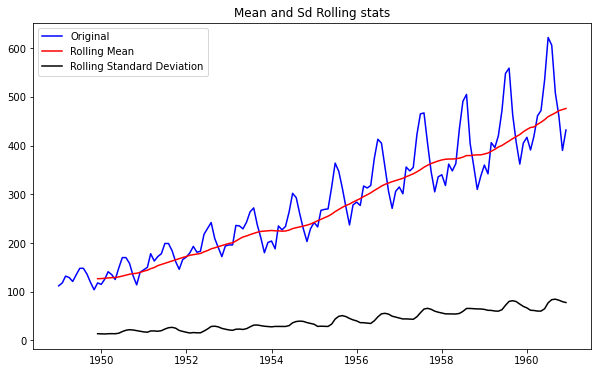

In [18]:
# Plotting rolling statistics
org = plt.plot(indexedDataFrame['value'], color='blue', label='Original')
mean = plt.plot(rollingmean, color='red', label='Rolling Mean')
std = plt.plot(rollingstd, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Mean and Sd Rolling stats')
plt.show(block=False)

In [19]:
# Testing Dickey-Fuller
from statsmodels.tsa.stattools import adfuller
print('Dickey Fuller Testing')
test = adfuller(indexedDataFrame['value'], autolag='AIC')
output = pd.Series(test[0:4], index=['Test stats','p-val','Lags Used','No of Observatiosn Used'])
for key,value in test[4].items():
    output['Critical value (%s)' %key] = value
print(output)
"""
From the graph we can see that rolling mean has a trend component and standard deviation is fairly constant with time. Also critical values are no where close to the Test Statistics. 
So we can conclude that our time series at this moment is not stationary.
"""

Dickey Fuller Testing
Test stats                   0.815369
p-val                        0.991880
Lags Used                   13.000000
No of Observatiosn Used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
Critical value (10%)        -2.578770
dtype: float64


'\nFrom the graph we can see that rolling mean has a trend component and standard deviation is fairly constant with time. Also critical values are no where close to the Test Statistics. \nSo we can conclude that our time series at this moment is not stationary.\n'

In [20]:
def stationaritytesting(indexedDataFrame):
    
    rollingmean = indexedDataFrame.rolling(window=12).mean()
    rollingstd = indexedDataFrame.rolling(window=12).std()
    # print(rollingmean,rollingstd)
    
    org = plt.plot(indexedDataFrame, color='blue', label='Original')
    mean = plt.plot(rollingmean, color='red', label='Rolling Mean')
    std = plt.plot(rollingstd, color='black', label='Rolling Standard Deviation')
    plt.legend(loc='best')
    plt.title('Mean and Sd Rolling stats')
    plt.show(block=False)
    
    print('Dickey Fuller Testing')
    test = adfuller(indexedDataFrame, autolag='AIC')
    output = pd.Series(test[0:4], index=['Test stats','p-val','Lags Used','No of Observatiosn Used'])
    for key,value in test[4].items():
        output['Critical value (%s)' %key] = value
    print(output)
    

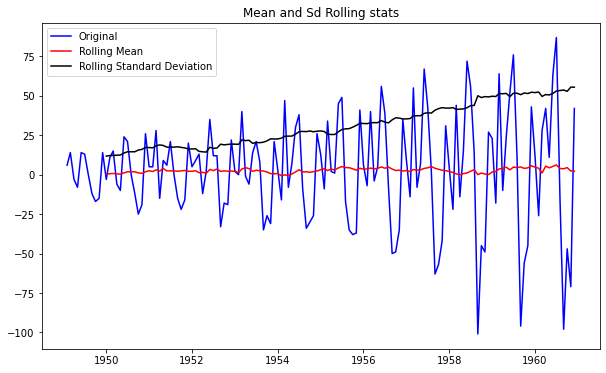

Dickey Fuller Testing
Test stats                  -2.829267
p-val                        0.054213
Lags Used                   12.000000
No of Observatiosn Used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
Critical value (10%)        -2.578770
dtype: float64


In [21]:
# dropna() function is used to remove rows and columns with Null/NaN values.
airpass = indexedDataFrame['value'].diff(periods=1)
airpass.dropna(inplace=True)
stationaritytesting(airpass)

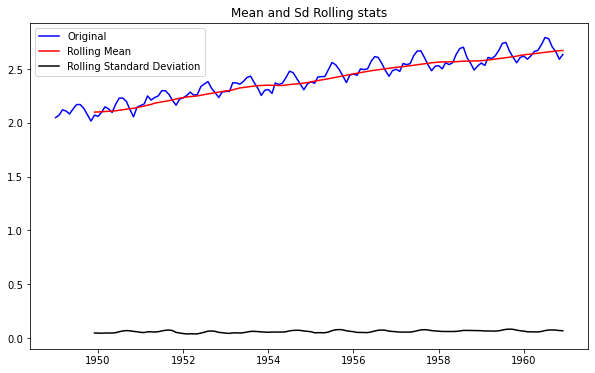

Dickey Fuller Testing
Test stats                  -1.717017
p-val                        0.422367
Lags Used                   13.000000
No of Observatiosn Used    130.000000
Critical value (1%)         -3.481682
Critical value (5%)         -2.884042
Critical value (10%)        -2.578770
dtype: float64


In [22]:
airpass_log = np.log10(indexedDataFrame['value'])
airpass_log.dropna(inplace=True)
stationaritytesting(airpass_log)

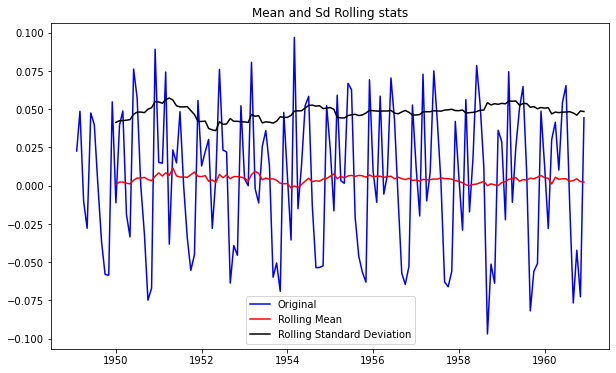

Dickey Fuller Testing
Test stats                  -2.717131
p-val                        0.071121
Lags Used                   14.000000
No of Observatiosn Used    128.000000
Critical value (1%)         -3.482501
Critical value (5%)         -2.884398
Critical value (10%)        -2.578960
dtype: float64


In [23]:
airpass_logdiff = airpass_log.diff(periods=1)
airpass_logdiff.dropna(inplace=True)
stationaritytesting(airpass_logdiff)

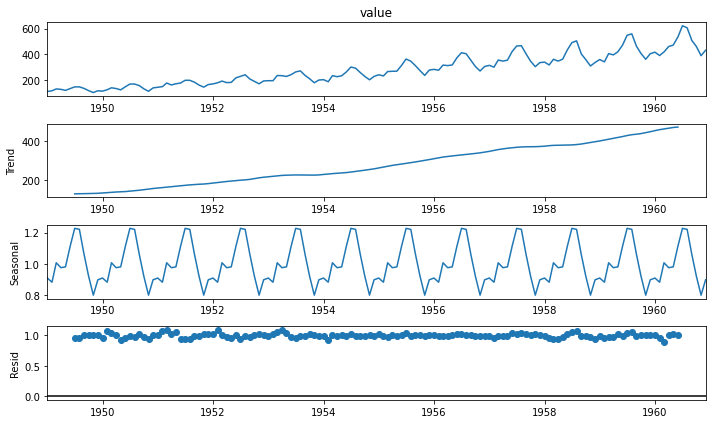

In [25]:
# Time Series Decomposition
"""
Decomposition of time series is a statistical task that deconstructs a time series into several components, each representing one of the underlying categories of patterns. Or in other words decomposition is a 
forecasting technique that seperates or decomposes historical data into different components and uses them to create a forecast that is more accurate than a simple trend line. 
"""
import statsmodels.api as sm
airpass_decompose = sm.tsa.seasonal_decompose(indexedDataFrame['value'], model="multiplicative", period=12)
airpass_decompose.plot()
plt.show()



In [26]:
#import sys
#!conda install --yes --prefix {sys.prefix} statsmodels

In [27]:
import statsmodels
print(statsmodels.__version__)

0.12.0


In [28]:
trend = airpass_decompose.trend
seasonal = airpass_decompose.seasonal
residual = airpass_decompose.resid

print("Trend \n", trend.head(24))
print("Seasonal \n", seasonal.head(24))
print("Residual \n", residual.head(24))

Trend 
 Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
1949-11-01    129.000000
1949-12-01    129.750000
1950-01-01    131.250000
1950-02-01    133.083333
1950-03-01    134.916667
1950-04-01    136.416667
1950-05-01    137.416667
1950-06-01    138.750000
1950-07-01    140.916667
1950-08-01    143.166667
1950-09-01    145.708333
1950-10-01    148.416667
1950-11-01    151.541667
1950-12-01    154.708333
Name: trend, dtype: float64
Seasonal 
 Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
1949-11-01    0.801178
1949-12-01    0.898824
1950-01-01    0.910230
1950-02-01    0.883625
1950-03-01    1.007

In [29]:
# Holt Double Exponential Method
"""
Holt's two-parameter model, also known as linear exponential smoothing, is a popular smoothing model for forecasting data with trend. Holt's model has three separate equations that work together to generate 
a final forecast. The first is a basic smoothing equation that directly adjusts the last smoothed value for last period's trend. The trend itself is updated over time through the second equation, where the 
trend is expressed as the difference between the last two smoothed values. Finally, the third equation is used to generate the final forecast. 
Holt's model uses two parameters, one for the overall smoothing and the other for the trend smoothing equation. The method is also called double exponential smoothing or trend-enhanced exponential smoothing.
"""
airpass_train = indexedDataFrame[0:int(len(indexedDataFrame)*0.80)]
airpass_test = indexedDataFrame[int(len(indexedDataFrame)*0.80):]
airpass_train_log = np.log10(airpass_train['value'])

In [30]:
def MeanAbsolutePercentError(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [31]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
airpass_model = ExponentialSmoothing(np.asarray(airpass_train['value']), seasonal_periods=24, trend='add',seasonal='mul').fit(optimized=True)

C:\Users\yare01\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


In [32]:
airpass_Holt = airpass_test.copy()

In [33]:
airpass_Holt['Holt']=airpass_model.forecast(len(airpass_test['value']))
MeanAbsolutePercentError(airpass_test['value'],airpass_Holt['Holt'])

5.145467111092426

In [34]:
airpass_model.params

{'smoothing_level': 0.8460268295166405,
 'smoothing_trend': 2.2399105954756274e-10,
 'smoothing_seasonal': 1.471838354170512e-11,
 'damping_trend': nan,
 'initial_level': 128.82310706453043,
 'initial_trend': 2.455699588013905,
 'initial_seasons': array([0.86024973, 0.83204854, 0.96683493, 0.93940025, 0.93560893,
        1.05782985, 1.16855451, 1.15065235, 1.0059199 , 0.8685328 ,
        0.75089804, 0.83911133, 0.8439523 , 0.80678465, 0.91657457,
        0.87837457, 0.89060196, 1.04153103, 1.15375411, 1.12983677,
        0.98516053, 0.85252768, 0.74735289, 0.84110939]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

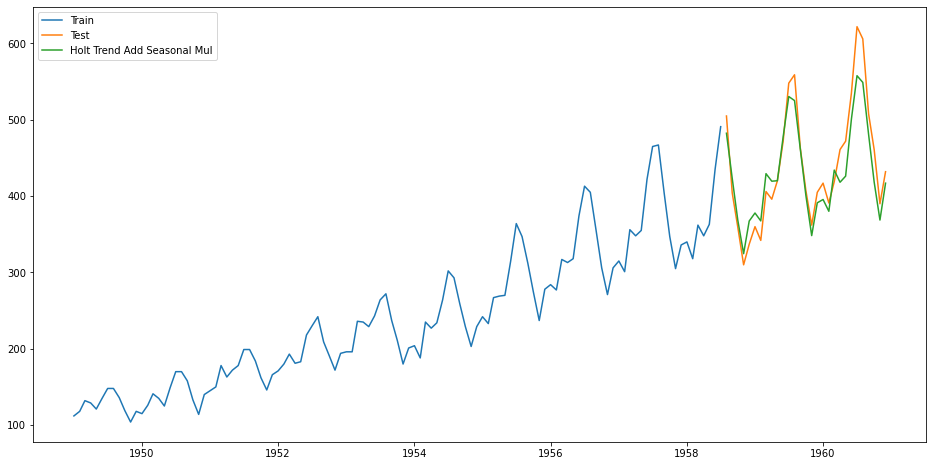

In [35]:
airpass_Holt['Pax'] = airpass_model.forecast(len(airpass_test['value']))
plt.figure(figsize=(16,8))
plt.plot(airpass_train['value'], label='Train')
plt.plot(airpass_test['value'], label ='Test')
plt.plot(airpass_Holt['Holt'], label='Holt Trend Add Seasonal Mul')
plt.legend(loc=0)

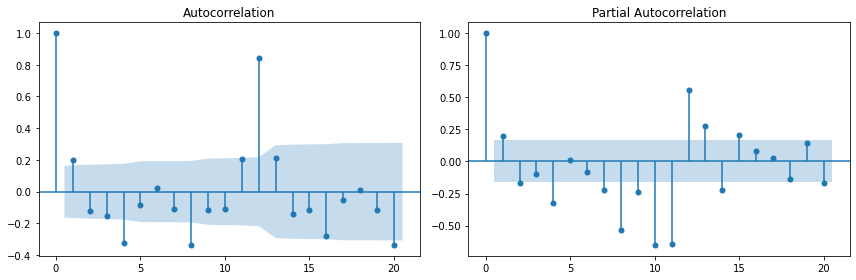

In [36]:
# Plotting ACF and PACF
"""
ACF & PACF graphs are used to find value of P & Q for ARIMA. We need to check, for which value in x-axis, graph line drops to 0 in y-axis for 1st time.
From PACF(at y=0), get P
From ACF(at y=0), get Q
"""
import statsmodels.tsa.api as smt
fig, axes = plt.subplots(1, 2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(airpass_logdiff, lags=20, ax=axes[0])
smt.graphics.plot_pacf(airpass_logdiff, lags=20, ax=axes[1])
plt.tight_layout()



In [40]:
# Building the models
# importing libraries
import itertools
# Define p, d and q parameters to range from 0 to 2
p = d = q = range(0,2)
# To generate random combination of p, d and q
pdq = list(itr.product(p, d , q))
# To generate different combinations of seasonal p, q and d triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq]
bestAIC = np.inf
bestPDQ = None
bestSeasonalPDQ = None
tmp_model = None
train_log = np.log10(indexedDataFrame['value'])

In [39]:
np.inf?

Type:        float
String form: inf
Docstring:   Convert a string or number to a floating point number, if possible.
